In [3]:
from math import sin, pi
import matplotlib.pyplot as plt

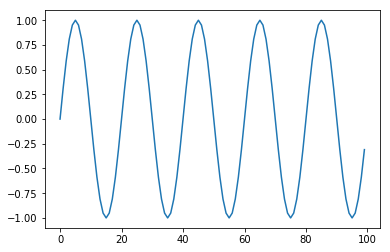

In [4]:
length = 100
freq = 5
sequence = [sin(2 * pi * freq * (i / float(length))) for i in range(length)]
plt.plot(sequence)
plt.show()

## Damped sine

In [5]:
from math import exp

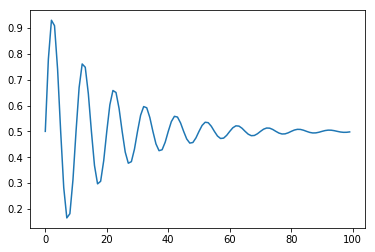

In [11]:
length = 100
period = 10
decay = 0.05
sequence = [0.5 + 0.5 * sin(2 * pi * i / period) * exp(-decay * i) for i in range(length)]
plt.plot(sequence)
plt.show()

## Random damped sine wave

In [12]:
def generate_sequence(length, period, decay):
    return [0.5 + 0.5 * sin(2 * pi * i / period) * exp(-decay * i) for i in range(length)]

In [21]:
from random import randint, uniform
import numpy as np

In [22]:
def generate_examples(length, n_patterns, output):
    X, y = list(), list()
    for _ in range(n_patterns):
        p = randint(10, 20)
        d = uniform(0.01, 0.1)
        sequence = generate_sequence(length + output, p, d)
        X.append(sequence[:-output])
        y.append(sequence[-output:])
    X = np.array(X).reshape(n_patterns, length, 1)
    y = np.array(y).reshape(n_patterns, output)
    return X, y

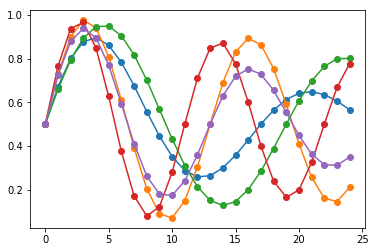

In [23]:
X, y = generate_examples(20, 5, 5)
for i in range(len(X)):
    plt.plot([x for x in X[i, :, 0]] + [x for x in y[i]], '-o')
plt.show()

## Model

In [24]:
length = 50
output = 5

In [25]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

Using TensorFlow backend.


In [26]:
model = Sequential()
model.add(LSTM(20, return_sequences = True, input_shape = (length, 1)))
model.add(LSTM(20))
model.add(Dense(output))
model.compile(loss = 'mae', optimizer = 'adam')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 50, 20)            1760      
_________________________________________________________________
lstm_2 (LSTM)                (None, 20)                3280      
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 105       
Total params: 5,145
Trainable params: 5,145
Non-trainable params: 0
_________________________________________________________________


In [27]:
X, y = generate_examples(length, 10000, output)
model.fit(X, y, batch_size = 10, epochs = 1)

Epoch 1/1
10000/10000 [==============================] - 40s 4ms/step - loss: 0.0425


In [28]:
X, y = generate_examples(length, 1000, output)
loss = model.evaluate(X, y, verbose = 0)
print('MAE: {}'.format(loss))

MAE: 0.021062423825263975


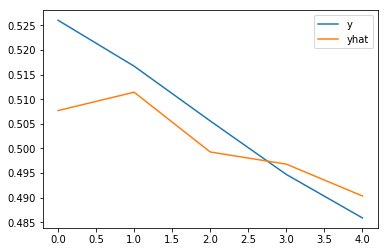

In [37]:
X, y = generate_examples(length, 1, output)
yhat = model.predict(X, verbose = 0)
plt.plot(y[0], label = 'y')
plt.plot(yhat[0], label = 'yhat')
plt.legend()
plt.show()